In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os 
import json
import seaborn as sns

In [2]:
#read in csv files and specific columns
ca_fire = pd.read_csv("California_Fire.csv", usecols=['AcresBurned','Longitude','Latitude','Started',\
                                                                  'Location','Counties'])
air2013=pd.read_csv("daily_aqi_by_county_2013.csv", usecols=['county Name', 'State Code', 'County Code', 'Date', 'AQI'])
air2014=pd.read_csv("daily_aqi_by_county_2014.csv", usecols=['county Name', 'State Code', 'County Code', 'Date', 'AQI'])
air2015=pd.read_csv("daily_aqi_by_county_2015.csv", usecols=['county Name', 'State Code', 'County Code', 'Date', 'AQI'])
air2016=pd.read_csv("daily_aqi_by_county_2016.csv", usecols=['county Name', 'State Code', 'County Code', 'Date', 'AQI'])
air2017=pd.read_csv("daily_aqi_by_county_2017.csv", usecols=['county Name', 'State Code', 'County Code', 'Date', 'AQI'])
air2018=pd.read_csv("daily_aqi_by_county_2018.csv", usecols=['county Name', 'State Code', 'County Code', 'Date', 'AQI'])
air2019=pd.read_csv("daily_aqi_by_county_2019.csv", usecols=['county Name', 'State Code', 'County Code', 'Date', 'AQI'])
air2020=pd.read_csv("daily_aqi_by_county_2020.csv", usecols=['county Name', 'State Code', 'County Code', 'Date', 'AQI'])

## CA fire Data Frame (2013-2020)

In [3]:
ca_fire.sort_values('Started',ascending=False)

,AcresBurned,Counties,Latitude,Location,Longitude,Started
1410,3126.0,Santa Barbara,34.502500,Highway 154 and E Camino Cielo near Painted Ca...,-119.785000,2019-11-25T19:59:12Z
1375,355.0,Placer,38.838992,"Foothills and McAnally Drive, northwest of Ros...",-121.325842,2019-11-25T12:39:44Z
1633,NaN,Yolo,38.734634,"County Road 102 and County Road 17, North of W...",-121.729691,2019-11-25T12:02:02Z
1532,75.0,Lake,39.100408,"Walker Ridge Road and Bartlett Springs Road, n...",-122.496548,2019-11-05T06:52:14Z
1412,2534.0,Tehama,40.036379,"Colyer Springs Rd and Raglin Ridge Rd, southwe...",-122.637837,2019-11-03T14:16:17Z
1604,19.0,Riverside,33.849906,"off of La Sierra Ave and Tin Mine Road, East ...",-117.461363,2019-11-01T13:04:34Z
1400,9999.0,Ventura,34.302212,"off of Bradley Road and Solano Verde Dr, Top o...",-118.997115,2019-10-31T20:58:28Z
1470,200.0,San Bernardino,34.183000,"off of W 59th and Hill Dr, in San Bernardino N...",-117.285000,2019-10-31T06:53:47Z
1552,50.0,San Diego,32.564583,"off of Border road and Canyon Road, Southeast ...",-116.834583,2019-10-31T06:39:56Z
1446,328.0,Riverside,33.985972,"5300 block of 46th Street, East Jurupa Valley",-117.414111,2019-10-31T06:22:34Z


In [4]:


#turn string to date time
ca_fire['time'] = pd.to_datetime(ca_fire['Started'])

In [5]:
#checking types 
ca_fire.dtypes

AcresBurned           float64
Counties               object
Latitude              float64
Location               object
Longitude             float64
Started                object
time           datetime64[ns]
dtype: object

In [6]:
#Changing title name 
ca_fire['Date'] = ca_fire['time'].dt.date

In [7]:
ca_fire=ca_fire.drop(columns=['Started','time'])

In [8]:
#check changes
ca_fire.head()

,AcresBurned,Counties,Latitude,Location,Longitude,Date
0,257314.0,Tuolumne,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,2013-08-17
1,30274.0,Los Angeles,34.585595,Angeles National Forest,-118.423176,2013-05-30
2,27531.0,Riverside,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,2013-07-15
3,27440.0,Placer,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,2013-08-10
4,24251.0,Ventura,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,2013-05-02


## Air Quality Data Frame 

In [9]:
air2013.columns

Index(['county Name', 'State Code', 'County Code', 'Date', 'AQI'], dtype='object')

In [10]:
#get all rows that have CA 
ca_2013=air2013.loc[air2013['State Code']==6]
ca_2013.head()

,county Name,State Code,County Code,Date,AQI
14508,Alameda,6,1,2013-01-01,62
14509,Alameda,6,1,2013-01-02,61
14510,Alameda,6,1,2013-01-03,81
14511,Alameda,6,1,2013-01-04,78
14512,Alameda,6,1,2013-01-05,84


In [11]:
#get all rows that have CA 
ca_2014=air2014.loc[air2014['State Code']==6]
ca_2014.head()

,county Name,State Code,County Code,Date,AQI
14522,Alameda,6,1,2014-01-01,109
14523,Alameda,6,1,2014-01-02,80
14524,Alameda,6,1,2014-01-03,80
14525,Alameda,6,1,2014-01-04,67
14526,Alameda,6,1,2014-01-05,56


In [12]:
#get all rows that have CA 
ca_2015=air2015.loc[air2015['State Code']==6]
ca_2015.head()

,county Name,State Code,County Code,Date,AQI
14863,Alameda,6,1,2015-01-01,61
14864,Alameda,6,1,2015-01-02,76
14865,Alameda,6,1,2015-01-03,96
14866,Alameda,6,1,2015-01-04,99
14867,Alameda,6,1,2015-01-05,91


In [13]:
#get all rows that have CA 
ca_2016=air2016.loc[air2016['State Code']==6]
ca_2016.head()

,county Name,State Code,County Code,Date,AQI
14751,Alameda,6,1,2016-01-01,41
14752,Alameda,6,1,2016-01-02,53
14753,Alameda,6,1,2016-01-03,72
14754,Alameda,6,1,2016-01-04,61
14755,Alameda,6,1,2016-01-05,38


In [14]:
#get all rows that have CA 
ca_2017=air2017.loc[air2017['State Code']==6]
ca_2017.head()

,county Name,State Code,County Code,Date,AQI
14997,Alameda,6,1,2017-01-01,45
14998,Alameda,6,1,2017-01-02,36
14999,Alameda,6,1,2017-01-03,35
15000,Alameda,6,1,2017-01-04,40
15001,Alameda,6,1,2017-01-05,36


In [15]:
#get all rows that have CA 
ca_2018=air2018.loc[air2018['State Code']==6]
ca_2018.head()

,county Name,State Code,County Code,Date,AQI
15249,Alameda,6,1,2018-01-01,87
15250,Alameda,6,1,2018-01-02,95
15251,Alameda,6,1,2018-01-03,110
15252,Alameda,6,1,2018-01-04,79
15253,Alameda,6,1,2018-01-05,35


In [16]:
#get all rows that have CA 
ca_2019=air2019.loc[air2019['State Code']==6]
ca_2019.head()

,county Name,State Code,County Code,Date,AQI
15119,Alameda,6,1,2019-01-01,34
15120,Alameda,6,1,2019-01-02,50
15121,Alameda,6,1,2019-01-03,71
15122,Alameda,6,1,2019-01-04,87
15123,Alameda,6,1,2019-01-05,53


In [17]:
#get all rows that have CA 
ca_2020=air2020.loc[air2020['State Code']==6]
ca_2020.head()

,county Name,State Code,County Code,Date,AQI
2185,Butte,6,7,2020-01-04,62
2186,Butte,6,7,2020-01-12,33
2187,Butte,6,7,2020-01-16,14
2188,Butte,6,7,2020-01-22,20
2189,Butte,6,7,2020-01-28,22


In [18]:
#add all the data frames of all years together into one dataframe
air=ca_2013.append(ca_2014, ignore_index=True)

In [19]:
air=air.append(ca_2015,ignore_index=True)

In [20]:
air=air.append(ca_2016,ignore_index=True)

In [21]:
air=air.append(ca_2017,ignore_index=True)

In [22]:
air=air.append(ca_2018,ignore_index=True)

In [23]:
air=air.append(ca_2019,ignore_index=True)

In [24]:
air=air.append(ca_2020,ignore_index=True)

In [25]:
#rename column name
air=air.rename(columns={'county Name':'Counties'})

## All tables needed

In [26]:
ca_fire

,AcresBurned,Counties,Latitude,Location,Longitude,Date
0,257314.0,Tuolumne,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,2013-08-17
1,30274.0,Los Angeles,34.585595,Angeles National Forest,-118.423176,2013-05-30
2,27531.0,Riverside,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,2013-07-15
3,27440.0,Placer,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,2013-08-10
4,24251.0,Ventura,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,2013-05-02
5,22992.0,Fresno,37.279000,Seven miles north of Big Creek,-119.318000,2013-07-22
6,20292.0,Riverside,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,2013-08-07
7,14754.0,Siskiyou,41.320000,"North Fork of the Salmon River, West of Sawyer...",-123.176000,2013-07-31
8,12503.0,Humboldt,41.035000,Tish Tang Ridge east of Hoopa Valley Reservation,-123.488000,2013-08-10
9,11429.0,Tehama,40.042630,"Near Deer Creek, 12 miles east of Los Molinos.",-121.853970,2013-08-23


In [27]:
air

,Counties,State Code,County Code,Date,AQI
0,Alameda,6,1,2013-01-01,62
1,Alameda,6,1,2013-01-02,61
2,Alameda,6,1,2013-01-03,81
3,Alameda,6,1,2013-01-04,78
4,Alameda,6,1,2013-01-05,84
5,Alameda,6,1,2013-01-06,54
6,Alameda,6,1,2013-01-07,58
7,Alameda,6,1,2013-01-08,72
8,Alameda,6,1,2013-01-09,61
9,Alameda,6,1,2013-01-10,35


In [28]:
air.dtypes

Counties       object
State Code      int64
County Code     int64
Date           object
AQI             int64
dtype: object

In [29]:
ca_fire.dtypes

AcresBurned    float64
Counties        object
Latitude       float64
Location        object
Longitude      float64
Date            object
dtype: object

## Merging CA fire and Air 

In [30]:
#checking type of date for ca_fire
ca_fire.iloc[:,5].head().iloc[0]

datetime.date(2013, 8, 17)

In [31]:
#checking type of date for air
air.iloc[:,3].head().iloc[0]

'2013-01-01'

In [32]:
#convert datetime to string to match air date type  
ca_fire['Date'] = ca_fire['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [33]:
#check changes
ca_fire.iloc[:,5].head().iloc[0]

'2013-08-17'

In [34]:
#merge ca_fire and air together 
df=ca_fire.merge(air,how='left', on = ['Counties', 'Date'])
df

,AcresBurned,Counties,Latitude,Location,Longitude,Date,State Code,County Code,AQI
0,257314.0,Tuolumne,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,2013-08-17,6.0,109.0,44.0
1,30274.0,Los Angeles,34.585595,Angeles National Forest,-118.423176,2013-05-30,6.0,37.0,126.0
2,27531.0,Riverside,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,2013-07-15,6.0,65.0,105.0
3,27440.0,Placer,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,2013-08-10,6.0,61.0,50.0
4,24251.0,Ventura,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,2013-05-02,6.0,111.0,87.0
5,22992.0,Fresno,37.279000,Seven miles north of Big Creek,-119.318000,2013-07-22,6.0,19.0,84.0
6,20292.0,Riverside,33.861570,"Poppet Flats Rd near Hwy 243, south of Banning",-116.904270,2013-08-07,6.0,65.0,84.0
7,14754.0,Siskiyou,41.320000,"North Fork of the Salmon River, West of Sawyer...",-123.176000,2013-07-31,6.0,93.0,50.0
8,12503.0,Humboldt,41.035000,Tish Tang Ridge east of Hoopa Valley Reservation,-123.488000,2013-08-10,6.0,23.0,28.0
9,11429.0,Tehama,40.042630,"Near Deer Creek, 12 miles east of Los Molinos.",-121.853970,2013-08-23,6.0,103.0,51.0


## Creating Weather Dataframe from API

In [35]:
#create new column to for API format 
df["Lat & Lon"]=str(df["Latitude"].round(2)) + "," + str(df["Longitude"].round(2))
df.head()

,AcresBurned,Counties,Latitude,Location,Longitude,Date,State Code,County Code,AQI,Lat & Lon
0,257314.0,Tuolumne,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,2013-08-17,6.0,109.0,44.0,0 37.86\n1 34.59\n2 33.71\n3...
1,30274.0,Los Angeles,34.585595,Angeles National Forest,-118.423176,2013-05-30,6.0,37.0,126.0,0 37.86\n1 34.59\n2 33.71\n3...
2,27531.0,Riverside,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,2013-07-15,6.0,65.0,105.0,0 37.86\n1 34.59\n2 33.71\n3...
3,27440.0,Placer,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,2013-08-10,6.0,61.0,50.0,0 37.86\n1 34.59\n2 33.71\n3...
4,24251.0,Ventura,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,2013-05-02,6.0,111.0,87.0,0 37.86\n1 34.59\n2 33.71\n3...


In [36]:


#create new column to for API format 
df['Lat & Lon'] = [','.join(str(x) for x in y) for y in map(tuple, df[['Latitude', 'Longitude']].values.round(2))]
df.head()

,AcresBurned,Counties,Latitude,Location,Longitude,Date,State Code,County Code,AQI,Lat & Lon
0,257314.0,Tuolumne,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,2013-08-17,6.0,109.0,44.0,"37.86,-120.09"
1,30274.0,Los Angeles,34.585595,Angeles National Forest,-118.423176,2013-05-30,6.0,37.0,126.0,"34.59,-118.42"
2,27531.0,Riverside,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,2013-07-15,6.0,65.0,105.0,"33.71,-116.73"
3,27440.0,Placer,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,2013-08-10,6.0,61.0,50.0,"39.12,-120.65"
4,24251.0,Ventura,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,2013-05-02,6.0,111.0,87.0,"0.0,0.0"


In [37]:
#get longitude and lattitude columns
ca_fire_lat_lon = ca_fire.iloc[:, np.r_[2, 4:5]]
ca_fire_lat_lon.head()

,Latitude,Longitude
0,37.857000,-120.086000
1,34.585595,-118.423176
2,33.709500,-116.728850
3,39.120000,-120.650000
4,0.000000,0.000000


In [38]:
x=1
y=0
#get location of all the rows within the range of latitude and longitude so there is no error for API
location_list=[]
for row in ca_fire_lat_lon.iterrows():
    location = ca_fire_lat_lon.iloc[:x]
    if ((location.iloc[y,0] >= -90) & (location.iloc[y,0] <= 90)) & ((location.iloc[y,1] >= -180) & (location.iloc[y,1] <= 180)):
        values = str(location.iloc[y,0]) + ',' + str(location.iloc[y,1])
        location_list.append(values)
        x+=1
        y+=1
    else:
        pass
    

In [39]:
#check list
location_list

['37.857,-120.086',
 '34.585595,-118.423176',
 '33.7095,-116.72885',
 '39.12,-120.65',
 '0.0,0.0',
 '37.279,-119.318',
 '33.86157,-116.90427',
 '41.32,-123.176',
 '41.035,-123.488',
 '40.042629999999996,-121.85396999999999',
 '40.498332,-122.535496',
 '32.95435,-116.47381000000001',
 '40.190062,-121.595555',
 '34.7861,-118.9411',
 '34.7861,-118.9411',
 '38.8167,-122.8498',
 '34.288877,-116.94131100000001',
 '37.90757,-121.88258200000001',
 '33.121109999999994,-116.52578999999999',
 '39.446267999999996,-121.38236',
 '33.341,-117.3092',
 '36.208,-118.444',
 '34.55048,-119.82428999999999',
 '37.58202,-119.91071000000001',
 '33.62236,-117.40288000000001',
 '33.044579999999996,-116.5209',
 '38.25108,-120.02778',
 '0.0,0.0',
 '35.707,-118.588',
 '34.882,-118.9194',
 '34.49149,-118.61004399999999',
 '34.90327,-118.93388',
 '38.774,-120.29799999999999',
 '34.071556,-117.048397',
 '40.00842,-120.76466599999999',
 '33.894055,-116.855019',
 '41.2415,-121.035',
 '35.15832,-120.05131000000002',
 '3

In [40]:
#turn list into set to get rid of duplicates
location_list = set(location_list)
location_list

{'0.0,0.0',
 '32.564465000000006,-116.900368',
 '32.612773,-116.70733500000001',
 '32.710918,-116.746023',
 '32.81,-116.49',
 '32.95435,-116.47381000000001',
 '33.003,-117.133',
 '33.044579999999996,-116.5209',
 '33.078948,-116.576454',
 '33.1109,-117.279',
 '33.1137,-117.1599',
 '33.121109999999994,-116.52578999999999',
 '33.312,-117.162',
 '33.341,-117.3092',
 '33.3529,-117.28488899999999',
 '33.417572,-117.55056699999999',
 '33.570291,-116.10815',
 '33.62236,-117.40288000000001',
 '33.641999999999996,-116.706',
 '33.655638,-116.161201',
 '33.7095,-116.72885',
 '33.748000000000005,-117.601',
 '33.7655,-117.6649',
 '33.86157,-116.90427',
 '33.894055,-116.855019',
 '33.910270000000004,-116.99895',
 '33.94528,-117.09306000000001',
 '33.9582,-116.6534',
 '33.96201,-116.90721299999998',
 '33.9634,-117.2508',
 '33.963591,-117.18793400000001',
 '33.969359999999995,-117.1265',
 '33.990128000000006,-117.164997',
 '33.99647,-116.84137',
 '34.001745,-117.302057',
 '34.003151,-117.106075',
 '34.

In [41]:
#turn back to list 
location_list = list(set(location_list))
location_list

['33.7095,-116.72885',
 '33.910270000000004,-116.99895',
 '37.96866,-121.91453',
 '34.882,-118.9194',
 '39.90465,-121.74367',
 '39.0448,-122.7656',
 '33.894055,-116.855019',
 '40.900999999999996,-121.368',
 '33.963591,-117.18793400000001',
 '38.882214000000005,-122.567525',
 '38.638828000000004,-122.655616',
 '33.641999999999996,-116.706',
 '34.001745,-117.302057',
 '32.81,-116.49',
 '37.116295,-119.63500400000001',
 '38.25108,-120.02778',
 '33.078948,-116.576454',
 '38.682378,-120.839075',
 '41.2415,-121.035',
 '39.6612,-121.50353999999999',
 '33.570291,-116.10815',
 '34.1834,-117.4408',
 '40.5445,-121.3754',
 '37.91529,-120.33313000000001',
 '40.88886,-120.95812600000001',
 '40.00842,-120.76466599999999',
 '36.763366999999995,-119.55824399999999',
 '39.013682,-122.49189399999999',
 '33.748000000000005,-117.601',
 '38.049929999999996,-120.90325',
 '38.4229,-122.0437',
 '37.169379,-119.75636000000002',
 '38.980579999999996,-122.81796000000001',
 '37.1927,-119.7917',
 '34.316,-117.352',

In [42]:
#remove this location because doesn't exist in API
location_list.remove('0.0,0.0')
location_list

['33.7095,-116.72885',
 '33.910270000000004,-116.99895',
 '37.96866,-121.91453',
 '34.882,-118.9194',
 '39.90465,-121.74367',
 '39.0448,-122.7656',
 '33.894055,-116.855019',
 '40.900999999999996,-121.368',
 '33.963591,-117.18793400000001',
 '38.882214000000005,-122.567525',
 '38.638828000000004,-122.655616',
 '33.641999999999996,-116.706',
 '34.001745,-117.302057',
 '32.81,-116.49',
 '37.116295,-119.63500400000001',
 '38.25108,-120.02778',
 '33.078948,-116.576454',
 '38.682378,-120.839075',
 '41.2415,-121.035',
 '39.6612,-121.50353999999999',
 '33.570291,-116.10815',
 '34.1834,-117.4408',
 '40.5445,-121.3754',
 '37.91529,-120.33313000000001',
 '40.88886,-120.95812600000001',
 '40.00842,-120.76466599999999',
 '36.763366999999995,-119.55824399999999',
 '39.013682,-122.49189399999999',
 '33.748000000000005,-117.601',
 '38.049929999999996,-120.90325',
 '38.4229,-122.0437',
 '37.169379,-119.75636000000002',
 '38.980579999999996,-122.81796000000001',
 '37.1927,-119.7917',
 '34.316,-117.352',

Code to create all the JSON files (already done for you, in the folder)

In [43]:
# #tqdm is barchart of where the progress is 
# #pip install tqdm in terminal
# #create json file for for every year in every month (change manually)

# for location in tqdm(location_list):
#     for i in range(1,12): 
#         url = ('https://api.worldweatheronline.com/premium/v1/past-weather.ashx?'
#                    'q=' + str(location) +'&'
#                    'date=2013-' + str(i) + '-01&'
#                    'enddate=2013-' + str(i) + '-31&'
#                    'tp=24&'
#                    'format=json&'
#                    'key=a520757b71bf4366927172949203010') 
#         response = requests.get(url)
            
#         with open('weather2013.json', "a") as file:
#             json.dump(response.json(), file)
#             file.write('\n')

In [44]:
#get 2013 data
file_name = 'weather2013.json'
records = [json.loads(line) for line in open(file_name)]

In [45]:
date = " "
avgtempF =" "
uvIndex = " "
windspeedMiles = " "
winddirDegree = " "
visibilityMiles = " "
winddir16Point = " "
HeatIndexF = " "
humidity = " "
pressure = " "
cloudcover = " "
WindGustMiles = " "
stats_list = []

for record in records: 
    location = record['data']['request'][0]['query'].split()
    location = str(location[1]) + ',' + str(location[4])
    for stats in record['data']['weather']:
        date = stats["date"]
        avgtempF = stats["avgtempF"]
        uvIndex = stats["uvIndex"]
        windspeedMiles = stats['hourly'][0]['windspeedMiles']
        winddirDegree = stats['hourly'][0]["winddirDegree"]
        visibilityMiles = stats['hourly'][0]["visibilityMiles"]
        winddir16Point = stats['hourly'][0]["winddir16Point"]
        HeatIndexF = stats['hourly'][0]["HeatIndexF"]
        humidity = stats['hourly'][0]["humidity"]
        pressure = stats['hourly'][0]["pressure"]
        cloudcover = stats['hourly'][0]["cloudcover"]
        WindGustMiles = stats['hourly'][0]["WindGustMiles"]
        stats_list.append([location,date,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,winddir16Point,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles])

#print(stats_list1)
print(len(stats_list))
print(stats_list[4])
    #print(response.json())

35780
['34.35,-117.62', '2013-01-05', '43', '3', '4', '109', '6', 'ESE', '44', '32', '1024', '10', '7']


In [46]:
#get 2014 data
file_name = 'weather2014.json'
records = [json.loads(line) for line in open(file_name)]

In [47]:
date = " "
avgtempF =" "
uvIndex = " "
windspeedMiles = " "
winddirDegree = " "
visibilityMiles = " "
winddir16Point = " "
HeatIndexF = " "
humidity = " "
pressure = " "
cloudcover = " "
WindGustMiles = " "

for record in records: 
    location = record['data']['request'][0]['query'].split()
    location = str(location[1]) + ',' + str(location[4])
    for stats in record['data']['weather']:
        date = stats["date"]
        avgtempF = stats["avgtempF"]
        uvIndex = stats["uvIndex"]
        windspeedMiles = stats['hourly'][0]['windspeedMiles']
        winddirDegree = stats['hourly'][0]["winddirDegree"]
        visibilityMiles = stats['hourly'][0]["visibilityMiles"]
        winddir16Point = stats['hourly'][0]["winddir16Point"]
        HeatIndexF = stats['hourly'][0]["HeatIndexF"]
        humidity = stats['hourly'][0]["humidity"]
        pressure = stats['hourly'][0]["pressure"]
        cloudcover = stats['hourly'][0]["cloudcover"]
        WindGustMiles = stats['hourly'][0]["WindGustMiles"]
        stats_list.append([location,date,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,winddir16Point,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles])

#print(stats_list1)
print(len(stats_list))
#print(stats_list[4])
    #print(response.json())

118451


In [48]:
#get 2015 data
file_name = 'weather2015.json'
records = [json.loads(line) for line in open(file_name)]

In [49]:
date = " "
avgtempF =" "
uvIndex = " "
windspeedMiles = " "
winddirDegree = " "
visibilityMiles = " "
winddir16Point = " "
HeatIndexF = " "
humidity = " "
pressure = " "
cloudcover = " "
WindGustMiles = " "

for record in records: 
    location = record['data']['request'][0]['query'].split()
    location = str(location[1]) + ',' + str(location[4])
    for stats in record['data']['weather']:
        date = stats["date"]
        avgtempF = stats["avgtempF"]
        uvIndex = stats["uvIndex"]
        windspeedMiles = stats['hourly'][0]['windspeedMiles']
        winddirDegree = stats['hourly'][0]["winddirDegree"]
        visibilityMiles = stats['hourly'][0]["visibilityMiles"]
        winddir16Point = stats['hourly'][0]["winddir16Point"]
        HeatIndexF = stats['hourly'][0]["HeatIndexF"]
        humidity = stats['hourly'][0]["humidity"]
        pressure = stats['hourly'][0]["pressure"]
        cloudcover = stats['hourly'][0]["cloudcover"]
        WindGustMiles = stats['hourly'][0]["WindGustMiles"]
        stats_list.append([location,date,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,winddir16Point,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles])

#print(stats_list1)
print(len(stats_list))
#print(stats_list[4])
    #print(response.json())

153786


In [50]:
#get 2016 data
file_name = 'weather2016.json'
records = [json.loads(line) for line in open(file_name)]

In [51]:
date = " "
avgtempF =" "
uvIndex = " "
windspeedMiles = " "
winddirDegree = " "
visibilityMiles = " "
winddir16Point = " "
HeatIndexF = " "
humidity = " "
pressure = " "
cloudcover = " "
WindGustMiles = " "

for record in records: 
    location = record['data']['request'][0]['query'].split()
    location = str(location[1]) + ',' + str(location[4])
    for stats in record['data']['weather']:
        date = stats["date"]
        avgtempF = stats["avgtempF"]
        uvIndex = stats["uvIndex"]
        windspeedMiles = stats['hourly'][0]['windspeedMiles']
        winddirDegree = stats['hourly'][0]["winddirDegree"]
        visibilityMiles = stats['hourly'][0]["visibilityMiles"]
        winddir16Point = stats['hourly'][0]["winddir16Point"]
        HeatIndexF = stats['hourly'][0]["HeatIndexF"]
        humidity = stats['hourly'][0]["humidity"]
        pressure = stats['hourly'][0]["pressure"]
        cloudcover = stats['hourly'][0]["cloudcover"]
        WindGustMiles = stats['hourly'][0]["WindGustMiles"]
        stats_list.append([location,date,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,winddir16Point,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles])

#print(stats_list1)
print(len(stats_list))
#print(stats_list[4])
    #print(response.json())

192144


In [52]:
#get 2017 data
file_name = 'weather2017.json'
records = [json.loads(line) for line in open(file_name)]

In [53]:
date = " "
avgtempF =" "
uvIndex = " "
windspeedMiles = " "
winddirDegree = " "
visibilityMiles = " "
winddir16Point = " "
HeatIndexF = " "
humidity = " "
pressure = " "
cloudcover = " "
WindGustMiles = " "

for record in records: 
    location = record['data']['request'][0]['query'].split()
    location = str(location[1]) + ',' + str(location[4])
    for stats in record['data']['weather']:
        date = stats["date"]
        avgtempF = stats["avgtempF"]
        uvIndex = stats["uvIndex"]
        windspeedMiles = stats['hourly'][0]['windspeedMiles']
        winddirDegree = stats['hourly'][0]["winddirDegree"]
        visibilityMiles = stats['hourly'][0]["visibilityMiles"]
        winddir16Point = stats['hourly'][0]["winddir16Point"]
        HeatIndexF = stats['hourly'][0]["HeatIndexF"]
        humidity = stats['hourly'][0]["humidity"]
        pressure = stats['hourly'][0]["pressure"]
        cloudcover = stats['hourly'][0]["cloudcover"]
        WindGustMiles = stats['hourly'][0]["WindGustMiles"]
        stats_list.append([location,date,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,winddir16Point,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles])

#print(stats_list1)
print(len(stats_list))
#print(stats_list[4])
    #print(response.json())

227479


In [54]:
#get 2018 data
file_name = 'weather2018.json'
records = [json.loads(line) for line in open(file_name)]

In [55]:
date = " "
avgtempF =" "
uvIndex = " "
windspeedMiles = " "
winddirDegree = " "
visibilityMiles = " "
winddir16Point = " "
HeatIndexF = " "
humidity = " "
pressure = " "
cloudcover = " "
WindGustMiles = " "

for record in records: 
    location = record['data']['request'][0]['query'].split()
    location = str(location[1]) + ',' + str(location[4])
    for stats in record['data']['weather']:
        date = stats["date"]
        avgtempF = stats["avgtempF"]
        uvIndex = stats["uvIndex"]
        windspeedMiles = stats['hourly'][0]['windspeedMiles']
        winddirDegree = stats['hourly'][0]["winddirDegree"]
        visibilityMiles = stats['hourly'][0]["visibilityMiles"]
        winddir16Point = stats['hourly'][0]["winddir16Point"]
        HeatIndexF = stats['hourly'][0]["HeatIndexF"]
        humidity = stats['hourly'][0]["humidity"]
        pressure = stats['hourly'][0]["pressure"]
        cloudcover = stats['hourly'][0]["cloudcover"]
        WindGustMiles = stats['hourly'][0]["WindGustMiles"]
        stats_list.append([location,date,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,winddir16Point,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles])

#print(stats_list1)
print(len(stats_list))
#print(stats_list[4])
    #print(response.json())

262814


In [56]:
#get 2019 data
file_name = 'weather2019.json'
records = [json.loads(line) for line in open(file_name)]

In [57]:
date = " "
avgtempF =" "
uvIndex = " "
windspeedMiles = " "
winddirDegree = " "
visibilityMiles = " "
winddir16Point = " "
HeatIndexF = " "
humidity = " "
pressure = " "
cloudcover = " "
WindGustMiles = " "

for record in records: 
    location = record['data']['request'][0]['query'].split()
    location = str(location[1]) + ',' + str(location[4])
    for stats in record['data']['weather']:
        date = stats["date"]
        avgtempF = stats["avgtempF"]
        uvIndex = stats["uvIndex"]
        windspeedMiles = stats['hourly'][0]['windspeedMiles']
        winddirDegree = stats['hourly'][0]["winddirDegree"]
        visibilityMiles = stats['hourly'][0]["visibilityMiles"]
        winddir16Point = stats['hourly'][0]["winddir16Point"]
        HeatIndexF = stats['hourly'][0]["HeatIndexF"]
        humidity = stats['hourly'][0]["humidity"]
        pressure = stats['hourly'][0]["pressure"]
        cloudcover = stats['hourly'][0]["cloudcover"]
        WindGustMiles = stats['hourly'][0]["WindGustMiles"]
        stats_list.append([location,date,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,winddir16Point,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles])

#print(stats_list1)
print(len(stats_list))
#print(stats_list[4])
    #print(response.json())

298149


In [58]:
#turn the list to a dateframe
weatherapi = pd.DataFrame(stats_list,columns=['Lat & Lon','Date','avgtempF','uvIndex','windspeedMiles','winddirDegree','visibilityMiles','winddir16Point','HeatIndexF','humidity','pressure','cloudcover','WindGustMiles'])
weatherapi.head()

,Lat & Lon,Date,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,winddir16Point,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles
0,"34.35,-117.62",2013-01-01,38,2,8,52,6,NE,38,38,1024,14,13
1,"34.35,-117.62",2013-01-02,41,3,9,41,6,NE,41,42,1021,0,16
2,"34.35,-117.62",2013-01-03,43,3,8,32,6,NNE,43,48,1022,0,15
3,"34.35,-117.62",2013-01-04,42,3,5,40,6,NE,43,36,1024,1,9
4,"34.35,-117.62",2013-01-05,43,3,4,109,6,ESE,44,32,1024,10,7


In [59]:
weatherapi.dtypes

Lat & Lon          object
Date               object
avgtempF           object
uvIndex            object
windspeedMiles     object
winddirDegree      object
visibilityMiles    object
winddir16Point     object
HeatIndexF         object
humidity           object
pressure           object
cloudcover         object
WindGustMiles      object
dtype: object

In [60]:
#turn all objects to floats
weatherapi['avgtempF'] = weatherapi['avgtempF'].astype(float)
weatherapi['uvIndex'] = weatherapi['uvIndex'].astype(float)
weatherapi['windspeedMiles'] = weatherapi['windspeedMiles'].astype(float)
weatherapi['winddirDegree'] = weatherapi['winddirDegree'].astype(float)
weatherapi['visibilityMiles'] = weatherapi['visibilityMiles'].astype(float)
weatherapi['HeatIndexF'] = weatherapi['HeatIndexF'].astype(float)
weatherapi['humidity'] = weatherapi['humidity'].astype(float)
weatherapi['pressure'] = weatherapi['pressure'].astype(float)
weatherapi['cloudcover'] = weatherapi['cloudcover'].astype(float)
weatherapi['WindGustMiles'] = weatherapi['WindGustMiles'].astype(float)


## Final Data Frame

In [61]:
#merge previous df and weather dataframe together 
ca_fire_final=df.merge(weatherapi,how='left', on = ['Lat & Lon', 'Date'])

In [62]:
#check changes
ca_fire_final.columns

Index(['AcresBurned', 'Counties', 'Latitude', 'Location', 'Longitude', 'Date',
       'State Code', 'County Code', 'AQI', 'Lat & Lon', 'avgtempF', 'uvIndex',
       'windspeedMiles', 'winddirDegree', 'visibilityMiles', 'winddir16Point',
       'HeatIndexF', 'humidity', 'pressure', 'cloudcover', 'WindGustMiles'],
      dtype='object')

In [63]:
#drop all the nan values in ca_fire_final
ca_fire_final = ca_fire_final.dropna()
ca_fire_final

,AcresBurned,Counties,Latitude,Location,Longitude,Date,State Code,County Code,AQI,Lat & Lon,...,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,winddir16Point,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles
0,257314.0,Tuolumne,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,2013-08-17,6.0,109.0,44.0,"37.86,-120.09",...,6.0,5.0,204.0,6.0,SSW,71.0,31.0,1013.0,13.0,7.0
1,30274.0,Los Angeles,34.585595,Angeles National Forest,-118.423176,2013-05-30,6.0,37.0,126.0,"34.59,-118.42",...,5.0,9.0,320.0,6.0,NW,65.0,31.0,1010.0,3.0,14.0
2,27531.0,Riverside,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,2013-07-15,6.0,65.0,105.0,"33.71,-116.73",...,6.0,8.0,274.0,6.0,W,77.0,34.0,1009.0,4.0,11.0
3,27440.0,Placer,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,2013-08-10,6.0,61.0,50.0,"39.12,-120.65",...,5.0,4.0,179.0,6.0,S,60.0,53.0,1015.0,4.0,7.0
5,22992.0,Fresno,37.279000,Seven miles north of Big Creek,-119.318000,2013-07-22,6.0,19.0,84.0,"37.28,-119.32",...,6.0,4.0,231.0,6.0,SW,69.0,36.0,1012.0,29.0,6.0
7,14754.0,Siskiyou,41.320000,"North Fork of the Salmon River, West of Sawyer...",-123.176000,2013-07-31,6.0,93.0,50.0,"41.32,-123.18",...,4.0,4.0,188.0,6.0,S,57.0,66.0,1018.0,18.0,5.0
8,12503.0,Humboldt,41.035000,Tish Tang Ridge east of Hoopa Valley Reservation,-123.488000,2013-08-10,6.0,23.0,28.0,"41.04,-123.49",...,4.0,3.0,199.0,3.0,SSW,54.0,83.0,1016.0,45.0,5.0
9,11429.0,Tehama,40.042630,"Near Deer Creek, 12 miles east of Los Molinos.",-121.853970,2013-08-23,6.0,103.0,51.0,"40.04,-121.85",...,6.0,4.0,139.0,6.0,SE,74.0,33.0,1011.0,1.0,6.0
11,7055.0,San Diego,32.954350,"off Sunrise Hwy, 9 miles southeast of Julian",-116.473810,2013-07-06,6.0,73.0,58.0,"32.95,-116.47",...,6.0,5.0,243.0,6.0,WSW,75.0,60.0,1008.0,24.0,7.0
13,4346.0,Kern,34.786100,"South of Frazier Mountain Park Rd, South of Fr...",-118.941100,2013-05-15,6.0,29.0,74.0,"34.79,-118.94",...,5.0,5.0,289.0,6.0,WNW,65.0,48.0,1015.0,5.0,8.0


## Clustering

In [64]:
from sklearn.cluster import KMeans

In [65]:
#use KMeans to find 3 clusters
clu=KMeans(n_clusters=3, random_state=0)

In [66]:
clu

KMeans(n_clusters=3, random_state=0)

In [67]:
df_copy1 = ca_fire_final.copy()

In [68]:
#drop columns that we dont need
a=df_copy1.drop(['Location','State Code','Latitude','Longitude',\
                     'County Code','winddir16Point', 'Counties','Date',\
                     'Lat & Lon'],axis=1)

In [69]:
a.head()

,AcresBurned,AQI,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles
0,257314.0,44.0,73.0,6.0,5.0,204.0,6.0,71.0,31.0,1013.0,13.0,7.0
1,30274.0,126.0,66.0,5.0,9.0,320.0,6.0,65.0,31.0,1010.0,3.0,14.0
2,27531.0,105.0,77.0,6.0,8.0,274.0,6.0,77.0,34.0,1009.0,4.0,11.0
3,27440.0,50.0,60.0,5.0,4.0,179.0,6.0,60.0,53.0,1015.0,4.0,7.0
5,22992.0,84.0,70.0,6.0,4.0,231.0,6.0,69.0,36.0,1012.0,29.0,6.0


In [70]:
clu.fit(a)

KMeans(n_clusters=3, random_state=0)

In [71]:
clu.labels_

array([1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

### Getting summary information on the clusters' characteristics

In [72]:
df2 = a.copy()

In [73]:
df2['Cluster']=clu.labels_

In [74]:
df2

,AcresBurned,AQI,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles,Cluster
0,257314.0,44.0,73.0,6.0,5.0,204.0,6.0,71.0,31.0,1013.0,13.0,7.0,1
1,30274.0,126.0,66.0,5.0,9.0,320.0,6.0,65.0,31.0,1010.0,3.0,14.0,2
2,27531.0,105.0,77.0,6.0,8.0,274.0,6.0,77.0,34.0,1009.0,4.0,11.0,2
3,27440.0,50.0,60.0,5.0,4.0,179.0,6.0,60.0,53.0,1015.0,4.0,7.0,2
5,22992.0,84.0,70.0,6.0,4.0,231.0,6.0,69.0,36.0,1012.0,29.0,6.0,2
7,14754.0,50.0,57.0,4.0,4.0,188.0,6.0,57.0,66.0,1018.0,18.0,5.0,2
8,12503.0,28.0,54.0,4.0,3.0,199.0,3.0,54.0,83.0,1016.0,45.0,5.0,0
9,11429.0,51.0,75.0,6.0,4.0,139.0,6.0,74.0,33.0,1011.0,1.0,6.0,0
11,7055.0,58.0,73.0,6.0,5.0,243.0,6.0,75.0,60.0,1008.0,24.0,7.0,0
13,4346.0,74.0,65.0,5.0,5.0,289.0,6.0,65.0,48.0,1015.0,5.0,8.0,0


In [75]:
df2['avgtempF'] = df2.avgtempF.astype(float)
df2['uvIndex'] = df2.uvIndex.astype(float)
df2['windspeedMiles'] = df2.windspeedMiles.astype(float)
df2['winddirDegree'] = df2.winddirDegree.astype(float)
df2['visibilityMiles'] = df2.visibilityMiles.astype(float)
df2['HeatIndexF'] = df2.HeatIndexF.astype(float)
df2['humidity'] = df2.humidity.astype(float)
df2['pressure'] = df2.pressure.astype(float)
df2['cloudcover'] = df2.cloudcover.astype(float)
df2['WindGustMiles'] = df2.WindGustMiles.astype(float)
#change data types from object to floats

In [76]:
df2.dtypes

AcresBurned        float64
AQI                float64
avgtempF           float64
uvIndex            float64
windspeedMiles     float64
winddirDegree      float64
visibilityMiles    float64
HeatIndexF         float64
humidity           float64
pressure           float64
cloudcover         float64
WindGustMiles      float64
Cluster              int32
dtype: object

In [77]:
#group the clusters so we can use
df2.groupby('Cluster').mean()

,AcresBurned,AQI,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles
Cluster,,,,,,,,,,,,
0,1466.600000,79.512,70.000000,5.688000,6.384000,199.264000,5.968000,69.944000,37.144000,1013.456000,4.928000,10.264000
1,257314.000000,44.000,73.000000,6.000000,5.000000,204.000000,6.000000,71.000000,31.000000,1013.000000,13.000000,7.000000
2,26831.857143,85.000,66.285714,5.142857,5.857143,227.714286,5.714286,65.714286,45.428571,1013.142857,10.285714,8.714286


In [78]:
df2.corr () 

,AcresBurned,AQI,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles,Cluster
AcresBurned,1.000000,-0.090437,0.009990,-0.000454,-0.064032,0.009932,-0.082073,-0.015471,-0.001343,-0.022594,0.136984,-0.085365,0.407749
AQI,-0.090437,1.000000,0.456916,0.388647,-0.061829,0.134522,0.136061,0.466085,-0.499975,-0.308613,-0.161332,-0.065157,0.019218
avgtempF,0.009990,0.456916,1.000000,0.940718,-0.140259,0.056685,0.199008,0.986152,-0.487150,-0.431766,-0.162710,-0.134916,-0.097680
uvIndex,-0.000454,0.388647,0.940718,1.000000,-0.111226,0.126181,0.199777,0.927211,-0.411802,-0.471013,-0.068420,-0.120877,-0.130082
windspeedMiles,-0.064032,-0.061829,-0.140259,-0.111226,1.000000,0.115542,0.100562,-0.156694,-0.206630,0.085038,-0.137009,0.969719,-0.048725
winddirDegree,0.009932,0.134522,0.056685,0.126181,0.115542,1.000000,-0.014774,0.080920,0.337964,-0.523304,0.225595,-0.008059,0.096287
visibilityMiles,-0.082073,0.136061,0.199008,0.199777,0.100562,-0.014774,1.000000,0.201318,-0.345362,-0.095130,-0.452993,0.108840,-0.185689
HeatIndexF,-0.015471,0.466085,0.986152,0.927211,-0.156694,0.080920,0.201318,1.000000,-0.426693,-0.439572,-0.168165,-0.157088,-0.118103
humidity,-0.001343,-0.499975,-0.487150,-0.411802,-0.206630,0.337964,-0.345362,-0.426693,1.000000,-0.051385,0.316134,-0.263735,0.119604
pressure,-0.022594,-0.308613,-0.431766,-0.471013,0.085038,-0.523304,-0.095130,-0.439572,-0.051385,1.000000,-0.089457,0.203953,-0.022864


### Finding the best Clustering Technique using the copied table

In [79]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    print ('k= %d ' % k)
    clus = [KMeans(n_clusters=k), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    #clus = [KMeans(n_clusters=k,n_jobs=-1)]
    for cl in clus:
        res = cl.fit(df2)
        sil = metrics.silhouette_score(df2, res.labels_)
        print (str(cl)[:6] + ' with k=' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
            bestK = k
print('***********************************************')
print ('Best algorithm is... ' + str(bestCl)[:6] + '  with k=' +str(bestK) )
print('**********************')
print ('With Silhouette Score ' + str(bestSil))

k= 2 
KMeans with k=2: 0.9744
Birch( with k=2: 0.9744
Agglom with k=2: 0.9744
k= 3 
KMeans with k=3: 0.8843
Birch( with k=3: 0.8705
Agglom with k=3: 0.8926
k= 4 
KMeans with k=4: 0.8264
Birch( with k=4: 0.8383
Agglom with k=4: 0.8383
k= 5 
KMeans with k=5: 0.8012
Birch( with k=5: 0.7984
Agglom with k=5: 0.7984
***********************************************
Best algorithm is... KMeans  with k=2
**********************
With Silhouette Score 0.9743992093595246


 silhouette value is a measure of how similar an object is to its own cluster
 high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters

In [80]:
df.dtypes

AcresBurned    float64
Counties        object
Latitude       float64
Location        object
Longitude      float64
Date            object
State Code     float64
County Code    float64
AQI            float64
Lat & Lon       object
dtype: object

### Finding the best Technique using the ca_fire_final table

In [81]:
df_copy2 = ca_fire_final.copy()

In [82]:
b=df_copy2.drop(['Counties','Location','Date','Lat & Lon','winddir16Point'],axis=1)
b

,AcresBurned,Latitude,Longitude,State Code,County Code,AQI,avgtempF,uvIndex,windspeedMiles,winddirDegree,visibilityMiles,HeatIndexF,humidity,pressure,cloudcover,WindGustMiles
0,257314.0,37.857000,-120.086000,6.0,109.0,44.0,73.0,6.0,5.0,204.0,6.0,71.0,31.0,1013.0,13.0,7.0
1,30274.0,34.585595,-118.423176,6.0,37.0,126.0,66.0,5.0,9.0,320.0,6.0,65.0,31.0,1010.0,3.0,14.0
2,27531.0,33.709500,-116.728850,6.0,65.0,105.0,77.0,6.0,8.0,274.0,6.0,77.0,34.0,1009.0,4.0,11.0
3,27440.0,39.120000,-120.650000,6.0,61.0,50.0,60.0,5.0,4.0,179.0,6.0,60.0,53.0,1015.0,4.0,7.0
5,22992.0,37.279000,-119.318000,6.0,19.0,84.0,70.0,6.0,4.0,231.0,6.0,69.0,36.0,1012.0,29.0,6.0
7,14754.0,41.320000,-123.176000,6.0,93.0,50.0,57.0,4.0,4.0,188.0,6.0,57.0,66.0,1018.0,18.0,5.0
8,12503.0,41.035000,-123.488000,6.0,23.0,28.0,54.0,4.0,3.0,199.0,3.0,54.0,83.0,1016.0,45.0,5.0
9,11429.0,40.042630,-121.853970,6.0,103.0,51.0,75.0,6.0,4.0,139.0,6.0,74.0,33.0,1011.0,1.0,6.0
11,7055.0,32.954350,-116.473810,6.0,73.0,58.0,73.0,6.0,5.0,243.0,6.0,75.0,60.0,1008.0,24.0,7.0
13,4346.0,34.786100,-118.941100,6.0,29.0,74.0,65.0,5.0,5.0,289.0,6.0,65.0,48.0,1015.0,5.0,8.0


In [83]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    print ('k= %d ' % k)
    clus = [KMeans(n_clusters=k), Birch(n_clusters=k), AgglomerativeClustering(n_clusters=k)]
    #clus = [KMeans(n_clusters=k,n_jobs=-1)]
    for cl in clus:
        res = cl.fit(a)
        sil = metrics.silhouette_score(a, res.labels_)
        print (str(cl)[:6] + ' with k=' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl
            bestK = k
print('***********************************************')
print ('Best algorithm is... ' + str(bestCl)[:6] + '  with k=' +str(bestK) )
print('**********************')
print ('With Silhouette Score ' + str(bestSil))

k= 2 
KMeans with k=2: 0.9744
Birch( with k=2: 0.9744
Agglom with k=2: 0.9744
k= 3 
KMeans with k=3: 0.8843
Birch( with k=3: 0.8705
Agglom with k=3: 0.8926
k= 4 
KMeans with k=4: 0.8264
Birch( with k=4: 0.8383
Agglom with k=4: 0.8383
k= 5 
KMeans with k=5: 0.8012
Birch( with k=5: 0.7984
Agglom with k=5: 0.7984
***********************************************
Best algorithm is... KMeans  with k=2
**********************
With Silhouette Score 0.9743992093961268


### Visulizing the graph with k=3

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


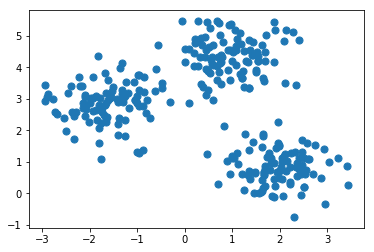

In [84]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3,          #n_samples=300 (total # of points equally divided among cluster)
                       cluster_std=0.60, random_state=0) 
plt.scatter(X[:, 0], X[:, 1], s=50);

In [85]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

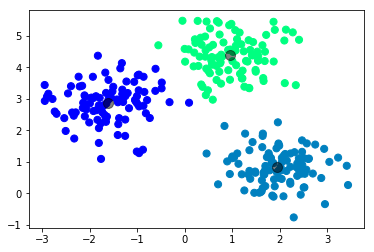

In [86]:
#same graph as above but with the center also marked
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

### Visulizing thee graph with the best algorithm - KMeans w k=2

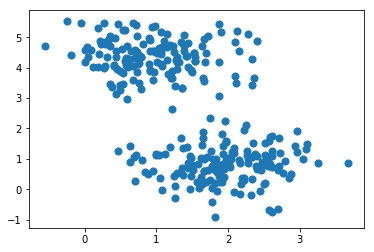

In [87]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=2,          #n_samples=300 (total # of points equally divided among cluster)
                       cluster_std=0.60, random_state=0) 
plt.scatter(X[:, 0], X[:, 1], s=50);

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

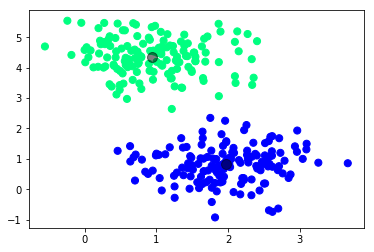

In [89]:
#same graph as above but with the center also marked
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

## Regression Analysis

In [90]:
X = ca_fire_final.drop('AcresBurned',axis=1)
#attributes that are string and obviously correlated
X = X.drop(['Location','State Code','Latitude','Longitude',\
            'County Code', 'winddir16Point','Counties','Date','Lat & Lon'],axis=1)
Y = ca_fire_final.AcresBurned

In [91]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns

### Data Exploration - Lasso

In [92]:
regLasso = linear_model.Lasso()

In [93]:
regLasso.fit(X,Y)

Lasso()

In [94]:
#explore relevant attributes
regLasso.coef_

array([  -94.28968171,  3026.47388351, -6119.56664194,  3544.82752923,
           9.12640233, -2598.82961629, -2342.1236652 ,  -169.93269369,
          74.99821963,   338.19871469, -2625.0416374 ])

In [95]:
d = {X.columns[i] : regLasso.coef_[i] for i in range(0,len(X.columns))}

In [96]:
s = pd.Series(d)

In [97]:
s[s != 0]

AQI                 -94.289682
avgtempF           3026.473884
uvIndex           -6119.566642
windspeedMiles     3544.827529
winddirDegree         9.126402
visibilityMiles   -2598.829616
HeatIndexF        -2342.123665
humidity           -169.932694
pressure             74.998220
cloudcover          338.198715
WindGustMiles     -2625.041637
dtype: float64

### Data Exploration - DecicionTreeRegressor

In [98]:
import sklearn.tree

In [99]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 2)

In [100]:
dt.fit(X,Y)

DecisionTreeRegressor(max_depth=2)

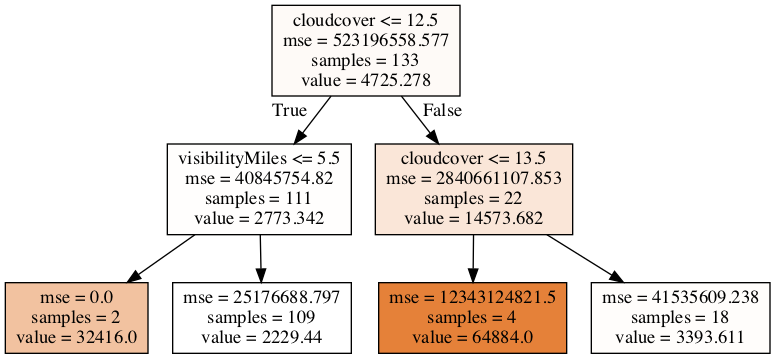

In [101]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Data Visualization - Count Plot

In [102]:
df_copy = ca_fire_final.copy()

In [103]:
df_copy['cloudcover1'] = pd.cut(df_copy.cloudcover, bins=(-1,12.5,df_copy.cloudcover.nlargest(1)))

In [104]:
df_copy['AcresBurned1'] = pd.cut(df_copy.AcresBurned,2)

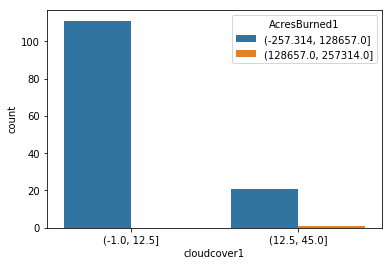

In [105]:
sns.countplot(x="cloudcover1", hue="AcresBurned1",data=df_copy)

In [106]:
df_copy['visibilityMiles'] = pd.cut(df_copy.visibilityMiles, bins=(0,5.5,df_copy.visibilityMiles.nlargest(1)))

**Look at left side of count plot only**

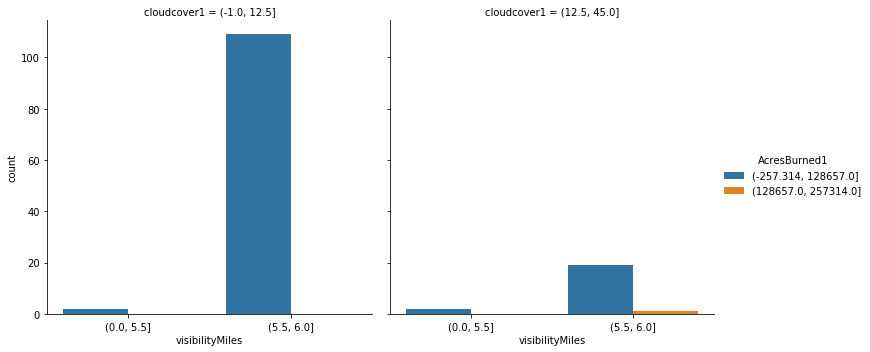

In [107]:
#look only on left side for depth 1 of visibility miles 
sns.catplot(x="visibilityMiles", hue="AcresBurned1", col="cloudcover1",
                data=df_copy, kind="count")

In [108]:
df_copy['cloudcover2'] = pd.cut(df_copy.cloudcover, bins=(-1,13.5,df_copy.cloudcover.nlargest(1)))

**Look at right side of count plot only**

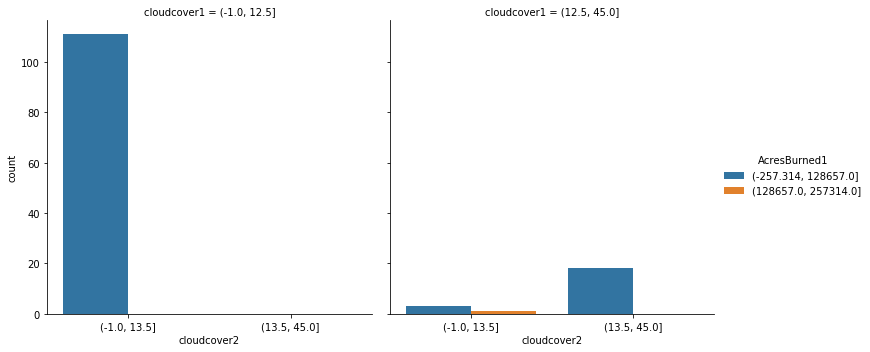

In [109]:
#look only on right side for depth 1 of cloud coverage
sns.catplot(x="cloudcover2", hue="AcresBurned1", col="cloudcover1",
                data=df_copy, kind="count")

### Data Prediction - Finding Best Regression Method

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [111]:
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

regs = [LinearRegression(), ElasticNet(), DecisionTreeRegressor(), GradientBoostingRegressor(), MLPRegressor()]#, SVR()]

In [112]:
from sklearn.model_selection import KFold

In [113]:
minMAD = 10000000
for reg in regs:
    kf = KFold(random_state=0,shuffle=True)
    mad = sklearn.model_selection.cross_val_score(reg,X,Y,\
             cv=kf,scoring='neg_mean_absolute_error').mean()
    # need the lowest scoring for mad
    print (str(reg)[:25] + ' with mad= ' + str(mad) )
    if mad < minMAD:
        minMAD = mad
        bestREG = reg
        
print('***********************************************')
print ('Best Regressor is... ' + str(bestREG)[:25] )
print('**********************')
print ('With MAD Score ' + str(minMAD))

LinearRegression() with mad= -9376.326980918244
ElasticNet() with mad= -8028.555804398931
DecisionTreeRegressor() with mad= -6648.263817663818
GradientBoostingRegressor with mad= -7049.767564155247


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor() with mad= -6058.328829214859
***********************************************
Best Regressor is... LinearRegression()
**********************
With MAD Score -9376.326980918244


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
